In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import cv2

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [4]:
picture_size=48
folder_path="Emotion Detection"

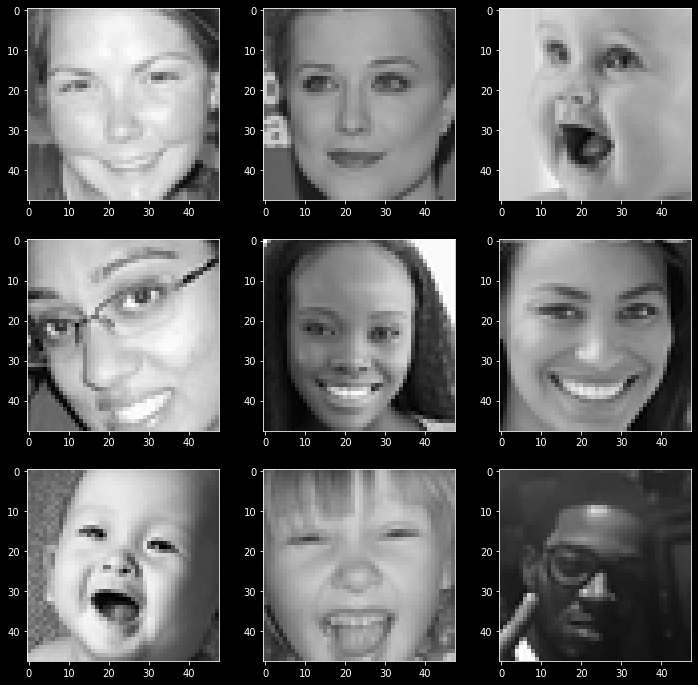

In [5]:
expression="happy"
plt.style.use("dark_background")
plt.figure(figsize=(12,12))
for i in range(1,10):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"/train/"+expression+"/"+
                 os.listdir(folder_path+"/train/"+expression)[i], target_size=(picture_size,picture_size))
                 
    plt.imshow(img)
plt.show()

In [6]:
batch_size=128

datagen_train=ImageDataGenerator()
datagen_test=ImageDataGenerator()

train_set=datagen_train.flow_from_directory(folder_path+"/train",
                                              target_size = (picture_size,picture_size),
                                               color_mode='grayscale',batch_size=batch_size,class_mode="categorical",
                                               shuffle=True)
                                             
test_set=datagen_test.flow_from_directory(folder_path+"/test",
                                         target_size=(picture_size, picture_size),
                                         color_mode="grayscale", batch_size=batch_size, class_mode="categorical",
                                         shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
from tensorflow.keras.optimizers import Adam,SGD, RMSprop

In [13]:
no_of_classes=7
model = keras.Sequential()

In [14]:


#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2st CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))                

#3st CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4st CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully Connected 1st layer

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

#Fully Connected 2nd layer

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation="softmax"))

opt=Adam(lr=0.0001)
model.compile(optimizer=opt,loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 128)      

C:\Users\shivd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint=ModelCheckpoint("./model.h5", monitor="val_acc",verbose=1, save_best_only=True, mode="max")

early_stopping=EarlyStopping(monitor = "val_loss",
                            min_delta=0,
                            patience=3,
                            verbose=1,
                            restore_best_weights=True)
                          
                           
reduce_learningrate=ReduceLROnPlateau(monitor="val_loss",
                                       factor=0.2,
                                       patience=3,
                                       verbose=1,
                                       restore_delta=0.0001)
callbacks_list=[early_stopping,checkpoint,reduce_learningrate]
epochs=40

In [17]:
history = model.fit_generator(generator=train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              epochs=epochs,
                              validation_data=test_set,
                              validation_steps=test_set.n//test_set.batch_size,
                              callbacks=callbacks_list)

C:\Users\shivd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
224/224 [==============================] - 537s 2s/step - loss: 2.0366 - accuracy: 0.2229 - val_loss: 1.7338 - val_accuracy: 0.3023
Epoch 2/40
224/224 [==============================] - 480s 2s/step - loss: 1.8423 - accuracy: 0.2887 - val_loss: 1.7048 - val_accuracy: 0.3238
Epoch 3/40
224/224 [==============================] - 473s 2s/step - loss: 1.7302 - accuracy: 0.3370 - val_loss: 1.7094 - val_accuracy: 0.3425
Epoch 4/40
224/224 [==============================] - 471s 2s/step - loss: 1.6435 - accuracy: 0.3678 - val_loss: 1.7173 - val_accuracy: 0.3563
Epoch 5/40
224/224 [==============================] - 445s 2s/step - loss: 1.5828 - accuracy: 0.3925 - val_loss: 1.5484 - val_accuracy: 0.3980
Epoch 6/40
224/224 [==============================] - 419s 2s/step - loss: 1.5190 - accuracy: 0.4170 - val_loss: 1.5213 - val_accuracy: 0.4117
Epoch 7/40
224/224 [==============================] - 419s 2s/step - loss: 1.4769 - accuracy: 0.4315 - val_loss: 1.5492 - val_accuracy: 0.4099

In [22]:
model.save('h5.py')

INFO:tensorflow:Assets written to: h5.py\assets


In [23]:
from tensorflow.keras.models import load_model
from time import sleep
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import cv2
import numpy as np
from tensorflow.keras import models

In [25]:
face_classifier=cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')
classifier=load_model('h5.py')

emotion_labels=["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]
cap=cv2.VideoCapture(0)

while True:
    _,frame=cap.read()
    labels=[]
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray)
    
    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)
        
        
        if np.sum([roi_gray])!=0:
            roi=roi_gray.astype("float")/255.0
            roi=img_to_array(roi)
            roi=np.expand_dims(roi,axis=0)
            
            prediction=classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position=(x,y-10)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,"No Faces",(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break

cap.release()
cv2.destroyAllWindows()